In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime as dt
import seaborn as sns

# Load and clean data
Note: due to IRB protocol, we can not share respondent - level data, only aggregated data

In [2]:
results = pd.read_csv('Young people and blood donation_July 2, 2021_09.39.csv',skiprows=1)

In [3]:
def prep_df(df):
  data = df.loc[1:]
  #only consider dates after 5/26/2021 (all responses before are test)
  data['Start Date'] = pd.to_datetime(data['Start Date'])
  data = data.loc[data['Start Date'] >= '2021-05-25']
  #remove responses that are 'I do not consent to participate'
  data = data.loc[data['Choose one of the following options:'] != 'I do not consent to participate in this survey'].reset_index()
  return data

In [4]:
data = prep_df(results)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
print('The number of all responses is:',len(data))
print('The number of completed responses:', len(data.loc[data['Finished'] == 'True']))

The number of all responses is: 576
The number of completed responses: 452


## Basic statistics for all questions


In [6]:
#function to get the percentage of each response per question
def percentage_response(column):
    df = pd.DataFrame(column.value_counts())
    df['Percent'] = round((df[df.columns[0]]/df[df.columns[0]].sum())*100,1)
    return df

In [7]:
#loop through demographic columns
columns_demos = list(data.iloc[:,19:25])
demo_dfs = []
for i in columns_demos:
    demo_dfs.append(percentage_response(data[i]))
    
#display
for i in demo_dfs:
    display(i)

,Gender,Percent
Male,286,51.5
Female,257,46.3
Rather not answer,12,2.2


,How old are you?,Percent
Between 19 and 22 years old,239,43.2
Between 23 and 25 years old,177,32.0
Between 26 and 30 years old,80,14.5
More than 30 years old,57,10.3


,What is your educational level? - Selected Choice,Percent
Master Degree,231,41.7
Bachelor Degree,219,39.5
High School,82,14.8
PhD,16,2.9
Other,6,1.1


,What is your educational level? - Other - Text,Percent
Some College (earning my BS),1,20.0
In college,1,20.0
BBA-(H),1,20.0
Some college,1,20.0
"Pursuing masters, have a bach.",1,20.0


,Do you currently live in New York City?,Percent
Yes,327,58.8
No,229,41.2


,"If you do not live in New York City, where do you currently live?",Percent
China,24,11.7
Shanghai,9,4.4
Jersey City,7,3.4
New Jersey,6,2.9
Barcelona,6,2.9
...,...,...
South Korea,1,0.5
Long Island,1,0.5
"Cherry hill , nj",1,0.5
Maine,1,0.5


In [8]:
#'lifestyle' questions
columns_lifestyle = list(data.iloc[:,26:32])
lifestyle_dfs = []
for i in columns_lifestyle:
    lifestyle_dfs.append(percentage_response(data[i]))
    
#display
for i in lifestyle_dfs:
    display(i)

,"How interested are you in issues related to physical and mental well-being?An example is attention to physical activity, to the condition of one's body and mind, etc. - Group",Percent
Passive,228,43.7
Promoter,172,33.0
Detractor,122,23.4


,"How interested are you in issues related to physical and mental well-being?An example is attention to physical activity, to the condition of one's body and mind, etc.",Percent
8,135,25.9
10,104,19.9
7,93,17.8
9,68,13.0
6,48,9.2
5,46,8.8
4,12,2.3
3,6,1.1
2,5,1.0
0,5,1.0


,How often do you exercise on average?,Percent
More than three times per week,129,24.5
Twice per week,118,22.4
Three times per week,116,22.0
Once per week,112,21.3
Never,52,9.9


,"Do you frequent places for sporting or recreational activity?For example: gyms, sports centers, dance schools,...",Percent
No,302,57.3
Yes,225,42.7


,Do you smoke?,Percent
No,455,86.3
Yes,72,13.7


,Are you vegan or vegetarian?,Percent
No,456,86.5
Yes,71,13.5


In [9]:
#blood donation questions
columns_donation = list(data.iloc[:,32:34])
donation_dfs = []
for i in columns_donation:
    donation_dfs.append(percentage_response(data[i]))
    
#display
for i in donation_dfs:
    display(i)

,Have you ever volunteered to donate blood?,Percent
No,313,59.7
Yes,211,40.3


,When is the last time you volunteered to donate blood?,Percent
Over three years ago,69,33.0
Within the past two years,43,20.6
Within the past three years,33,15.8
I donate whenever I am eligible,26,12.4
Within the past 6 months,23,11.0
Within the past year,15,7.2


In [10]:
#info blood donation questions
columns_info_donation = list(data.iloc[:,36:37])
donation_dfs = []
for i in columns_info_donation:
    donation_dfs.append(percentage_response(data[i]))
    
#display
for i in donation_dfs:
    display(i)

,Where did you first get information about donating blood? - Selected Choice,Percent
Through school or an employer,267,52.6
Through the organization that manages the collection of donations (ex: New York Blood Center or Red Cross),85,16.7
Through friends and/or relatives,78,15.4
Through social media posts,35,6.9
Through the internet (not social media),21,4.1
Other,12,2.4
Through the doctor,10,2.0


In [11]:
#consideration blood donation questions
columns_consideration_donation = list(data.iloc[:,40:42])
donation_dfs = []
for i in columns_consideration_donation:
    donation_dfs.append(percentage_response(data[i]))
    
#display
for i in donation_dfs:
    display(i)

,What is your feeling about blood donation?,Percent
Positive,421,82.9
I'm not interested,37,7.3
Doubtful,37,7.3
Negative,13,2.6


,"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",Percent
No,328,64.6
Yes,180,35.4


### Investigating target group (respondents that have considered donating blood recently but have not yet volunteered) vs. those who haven't considered donating blood this year.

How does this change based on age, health habits and social-ethical interests?

In [12]:
def consider_donating(df,question):
    df = pd.pivot_table(df, values='Response ID', index=question,
                    columns=['Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?'], aggfunc='count',fill_value=0)
    df['% No'] = round((df['No'] / (df['Yes'] +df['No']))*100,1)
    df['% Yes'] = round((df['Yes'] / (df['Yes'] +df['No']))*100,1)
    return df

In [13]:
demo_questions = data.columns[19:32]
demo_dfs_consider = []
for i in demo_questions:
    demo_dfs_consider.append(consider_donating(data,i))
    
for i in demo_dfs_consider:
    display(i)

"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Gender,,,,
Female,144,90,61.5,38.5
Male,180,85,67.9,32.1
Rather not answer,4,5,44.4,55.6


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
How old are you?,,,,
Between 19 and 22 years old,134,89,60.1,39.9
Between 23 and 25 years old,110,46,70.5,29.5
Between 26 and 30 years old,49,25,66.2,33.8
More than 30 years old,35,19,64.8,35.2


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
What is your educational level? - Selected Choice,,,,
Bachelor Degree,127,73,63.5,36.5
High School,45,34,57.0,43.0
Master Degree,142,66,68.3,31.7
Other,4,2,66.7,33.3
PhD,9,5,64.3,35.7


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
What is your educational level? - Other - Text,,,,
BBA-(H),1,0,100.0,0.0
In college,1,0,100.0,0.0
"Pursuing masters, have a bach.",0,1,0.0,100.0
Some College (earning my BS),0,1,0.0,100.0
Some college,1,0,100.0,0.0


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Do you currently live in New York City?,,,,
No,134,72,65.0,35.0
Yes,194,108,64.2,35.8


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
"If you do not live in New York City, where do you currently live?",,,,
Abu Dhabi,0,1,0.0,100.0
Abu Dhabu,1,0,100.0,0.0
"Ann Arbor, Michigan",1,0,100.0,0.0
Arizona,0,1,0.0,100.0
"Athens, GA",1,0,100.0,0.0
...,...,...,...,...
Wisconsin,1,1,50.0,50.0
"Yonkers, NY",1,1,50.0,50.0
california,0,1,0.0,100.0


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Are you or have you ever been a student of New York University?,,,,
No,13,4,76.5,23.5
Yes,314,176,64.1,35.9


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
"How interested are you in issues related to physical and mental well-being?An example is attention to physical activity, to the condition of one's body and mind, etc. - Group",,,,
Detractor,88,32,73.3,26.7
Passive,142,78,64.5,35.5
Promoter,93,70,57.1,42.9


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
"How interested are you in issues related to physical and mental well-being?An example is attention to physical activity, to the condition of one's body and mind, etc.",,,,
0,4,1,80.0,20.0
10,57,42,57.6,42.4
2,5,0,100.0,0.0
3,5,1,83.3,16.7
4,7,5,58.3,41.7
5,32,12,72.7,27.3
6,35,13,72.9,27.1
7,54,36,60.0,40.0
8,88,42,67.7,32.3


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
How often do you exercise on average?,,,,
More than three times per week,72,48,60.0,40.0
Never,33,18,64.7,35.3
Once per week,78,32,70.9,29.1
Three times per week,73,42,63.5,36.5
Twice per week,72,40,64.3,35.7


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
"Do you frequent places for sporting or recreational activity?For example: gyms, sports centers, dance schools,...",,,,
No,189,109,63.4,36.6
Yes,139,71,66.2,33.8


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Do you smoke?,,,,
No,293,146,66.7,33.3
Yes,35,34,50.7,49.3


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Are you vegan or vegetarian?,,,,
No,284,154,64.8,35.2
Yes,44,26,62.9,37.1


For the most part, they aren't any major differences between subgroups in whether they recently considered donating blood. The biggest difference is for non-smokers vs. smokers (33% to 50% yes) with smokers more likely to consider donating blood recently. 

In [14]:
#social media use
social_questions = data.columns[48:59]
social_dfs_consider = []
for i in social_questions:
    social_dfs_consider.append(consider_donating(data,i))
    print()
    
for i in social_dfs_consider:
    display(i)

"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Have you seen an increase in online blood donation content with the current COVID-19 pandemic?,,,,
I don't know,103,47,68.7,31.3
No,161,76,67.9,32.1
Yes,45,53,45.9,54.1


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Do you see or share content about donating blood in everyday social media use?,,,,
No,284,150,65.4,34.6
Yes,24,26,48.0,52.0


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Which social media platform do you use most often?It is possible not to select an option if you do not use social media - Selected Choice,,,,
Facebook,21,13,61.8,38.2
"Facebook,LinkedIn",2,1,66.7,33.3
"Facebook,LinkedIn,Snapchat",1,0,100.0,0.0
"Facebook,Snapchat",1,1,50.0,50.0
Instagram,106,60,63.9,36.1
"Instagram,Facebook",5,3,62.5,37.5
"Instagram,Facebook,LinkedIn",5,1,83.3,16.7
"Instagram,Facebook,LinkedIn,Snapchat",1,1,50.0,50.0
"Instagram,Facebook,LinkedIn,Snapchat,Other",1,0,100.0,0.0


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Which social media platform do you use most often?It is possible not to select an option if you do not use social media - Other - Text,,,,
Discord,0,1,0.0,100.0
Do not use social media,1,0,100.0,0.0
Don't use Social media,0,1,0.0,100.0
I do not have social media,1,0,100.0,0.0
I don't use social media,1,0,100.0,0.0
None,1,1,50.0,50.0
Reddit,4,5,44.4,55.6
Reddit,1,1,50.0,50.0
Sina Weibo,1,0,100.0,0.0


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
How often do you use your social media accounts?,,,,
Between 1 and 2 hours per day,102,53,65.8,34.2
Between 2 and 3 hours per day,54,29,65.1,34.9
Less than 1 hour per day,98,54,64.5,35.5
More than 3 hours per day,50,38,56.8,43.2


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
On which of the following social media platforms have you seen online content or advertising regarding blood donation?Multiple choice.It is possible not to select any option if you have never seen any advertising or sponsored content regarding blood donation - Selected Choice,,,,
Facebook,25,21,54.3,45.7
"Facebook,LinkedIn",0,1,0.0,100.0
Instagram,50,43,53.8,46.2
"Instagram,Facebook",14,4,77.8,22.2
"Instagram,Facebook,LinkedIn",2,3,40.0,60.0
"Instagram,LinkedIn,TikTok",1,0,100.0,0.0
"Instagram,Other",0,1,0.0,100.0
"Instagram,Snapchat",1,0,100.0,0.0
"Instagram,Snapchat,TikTok",0,1,0.0,100.0


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
On which of the following social media platforms have you seen online content or advertising regarding blood donation?Multiple choice.It is possible not to select any option if you have never seen any advertising or sponsored content regarding blood donation - Other - Text,,,,
Direct email and SMS messages,0,1,0.0,100.0
Don't use Social media,0,1,0.0,100.0
Email,2,0,100.0,0.0
Email,1,0,100.0,0.0
I do not use social media,1,0,100.0,0.0
I don't think I have seen blood donation on social media.,1,0,100.0,0.0
None,11,2,84.6,15.4
None,1,0,100.0,0.0
Reddit,2,0,100.0,0.0


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
"If you saw sponsored posts related to blood donation on social media, would you open the link to get more information?",,,,
Maybe,131,75,63.6,36.4
No,123,45,73.2,26.8
Yes,49,56,46.7,53.3


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Have you seen your friends and/or followers sharing their blood donation experience?Single choice.,,,,
No,216,113,65.7,34.3
Yes,91,62,59.5,40.5


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Do you follow the blood donation center in your area on social media?Single choice.,,,,
Maybe,14,3,82.4,17.6
No,287,158,64.5,35.5
Yes,7,15,31.8,68.2


"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Would you be incentivized to donate blood if blood samples were taken directly at school and/or in the workplace?,,,,
Maybe,97,20,82.9,17.1
No,64,10,86.5,13.5
Yes,145,146,49.8,50.2


In [15]:
social_use = data[['How old are you?','Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?','Which social media platform do you use most often?It is possible not to select an option if you do not use social media - Selected Choice']]
social_platforms = ['Twitter','Instagram','Facebook','TikTok','LinkedIn','Snapchat','Other']
for i in social_platforms:
    social_use[i] = social_use['Which social media platform do you use most often?It is possible not to select an option if you do not use social media - Selected Choice'].str.contains(i)
#swap out true and false for 1 and 0 
social_use = social_use.drop(columns=['Which social media platform do you use most often?It is possible not to select an option if you do not use social media - Selected Choice'])
f = (lambda x: 1 if x==True else x)
social_use = social_use.applymap(f)
g = (lambda x: 0 if x==False else x)
social_use = social_use.applymap(g)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
#split consider into two dfs to group and visualize
social_use_consider = social_use.loc[social_use['Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?'] == 'Yes']
social_use_not_consider = social_use.loc[social_use['Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?'] == 'No']
social_grouped_consider = social_use_consider.groupby('How old are you?').agg('sum')
social_grouped_not_consider = social_use_not_consider.groupby('How old are you?').agg('sum')

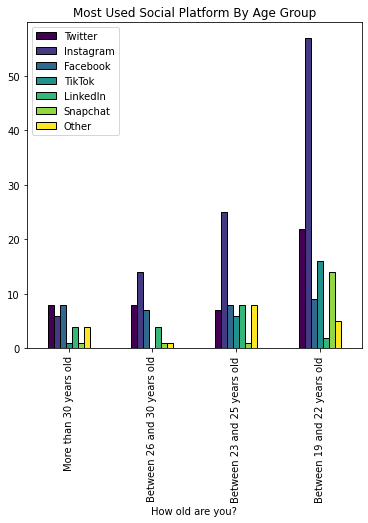

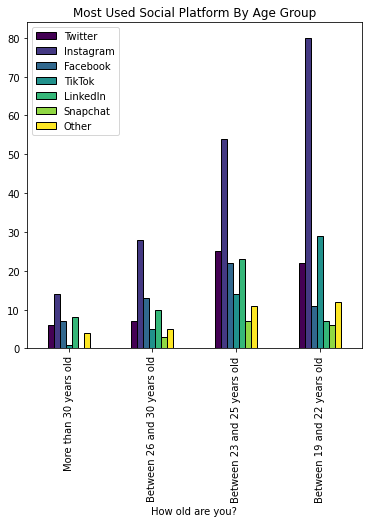

In [17]:
#most used platform
dfs = [social_grouped_consider,social_grouped_not_consider]
for i in dfs:
    i.sort_index(ascending=False).plot(
        kind='bar',
        figsize=(6, 6),
        cmap='viridis',
        edgecolor='black',
        fontsize=10,
        title='Most Used Social Platform By Age Group',
        ).yaxis.label.set_visible(False)

Instagram is the most popular social media platform across age groups.

### Investigating importance of social-ethical causes

In [18]:
causes = data[['How old are you?','Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?','How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Workers\' rights',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - LGBT+ rights',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Fight against racism',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Women\'s rights',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Animal rights',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Environmentalism and climate change',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Income inequality']]
#rename columns
causes.columns = ['age','considered donating?','Workers\' rights','LGBT+ rights','Fight agaisnt racism','Women\'s rights','Animal rights','Environmentalism and climate change','Income inequality']

In [19]:
#create 'causes score' which is an average
causes['score'] = causes.iloc[:, 2:].astype(float).mean(axis=1)
causes_consider = causes.loc[causes['considered donating?'] == 'Yes']
causes_not_consider = causes.loc[causes['considered donating?'] == 'No']
causes_grouped_consider = causes_consider.groupby('age').mean()
causes_grouped_not_consider = causes_not_consider.groupby('age').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
causes_grouped_consider

,score
age,
Between 19 and 22 years old,4.369748
Between 23 and 25 years old,4.403061
Between 26 and 30 years old,4.142857
More than 30 years old,3.849624


In [21]:
causes_grouped_not_consider

,score
age,
Between 19 and 22 years old,4.014406
Between 23 and 25 years old,3.934402
Between 26 and 30 years old,3.957447
More than 30 years old,4.140756


Minimal difference between the average causes 'score' for those that considered and did not consider donating blood recently.

### Further exploration of the relationship between the following health habits and social-ethical causes:
- Do you frequent places for sporting or recreational activity?For example: gyms, sports centers, dance schools,...',
- Do you smoke?
- Are you vegan or vegetarian?
- Have you ever volunteered to donate blood?

In [22]:
causes_corr = data[['How interested are you in issues related to physical and mental well-being?An example is attention to physical activity, to the condition of one\'s body and mind, etc.',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Workers\' rights',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - LGBT+ rights',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Fight against racism',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Women\'s rights',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Animal rights',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Environmentalism and climate change',
       'How relevant do you consider the following ethical and social issues in your life on a scale of 1 to 5?Scale 1: not relevant at all 5: extremely relevant - Income inequality',
       'Do you frequent places for sporting or recreational activity?For example: gyms, sports centers, dance schools,...',
       'Do you smoke?','Are you vegan or vegetarian?', 'Have you ever volunteered to donate blood?']]
#rename columns
causes_corr.columns = ['health interest','Workers\' rights','LGBT+ rights','Fight agaisnt racism','Women\'s rights','Animal rights','Environmentalism and climate change','Income inequality','frequents sport places','smoker','vegan/vegetarian','donor']

In [23]:
causes_corr = causes_corr.replace('No',0)
causes_corr = causes_corr.replace('Yes',1)
causes_corr = causes_corr.apply(pd.to_numeric)

In [24]:
causes_corr.corr()

,health interest,Workers' rights,LGBT+ rights,Fight agaisnt racism,Women's rights,Animal rights,Environmentalism and climate change,Income inequality,frequents sport places,smoker,vegan/vegetarian,donor
health interest,1.000000,0.204682,0.184270,0.154324,0.205171,0.159213,0.173164,0.138453,0.143004,-0.001586,0.095094,0.131650
Workers' rights,0.204682,1.000000,0.431565,0.509629,0.455080,0.379293,0.429504,0.594365,0.045810,0.060822,0.077790,0.015130
LGBT+ rights,0.184270,0.431565,1.000000,0.558389,0.642757,0.452474,0.455310,0.471207,0.032788,0.039071,0.117616,0.026093
Fight agaisnt racism,0.154324,0.509629,0.558389,1.000000,0.679433,0.336404,0.509396,0.556769,-0.004595,0.011948,0.054009,-0.022006
Women's rights,0.205171,0.455080,0.642757,0.679433,1.000000,0.435095,0.448560,0.501787,0.021099,-0.015851,0.069773,0.019341
Animal rights,0.159213,0.379293,0.452474,0.336404,0.435095,1.000000,0.452771,0.343269,0.103891,0.055180,0.238117,-0.025675
Environmentalism and climate change,0.173164,0.429504,0.455310,0.509396,0.448560,0.452771,1.000000,0.562376,-0.002178,0.060234,0.134268,0.062150
Income inequality,0.138453,0.594365,0.471207,0.556769,0.501787,0.343269,0.562376,1.000000,-0.023889,0.067778,0.055515,0.010817
frequents sport places,0.143004,0.045810,0.032788,-0.004595,0.021099,0.103891,-0.002178,-0.023889,1.000000,0.002904,-0.059697,0.001607
smoker,-0.001586,0.060822,0.039071,0.011948,-0.015851,0.055180,0.060234,0.067778,0.002904,1.000000,-0.027512,-0.006705


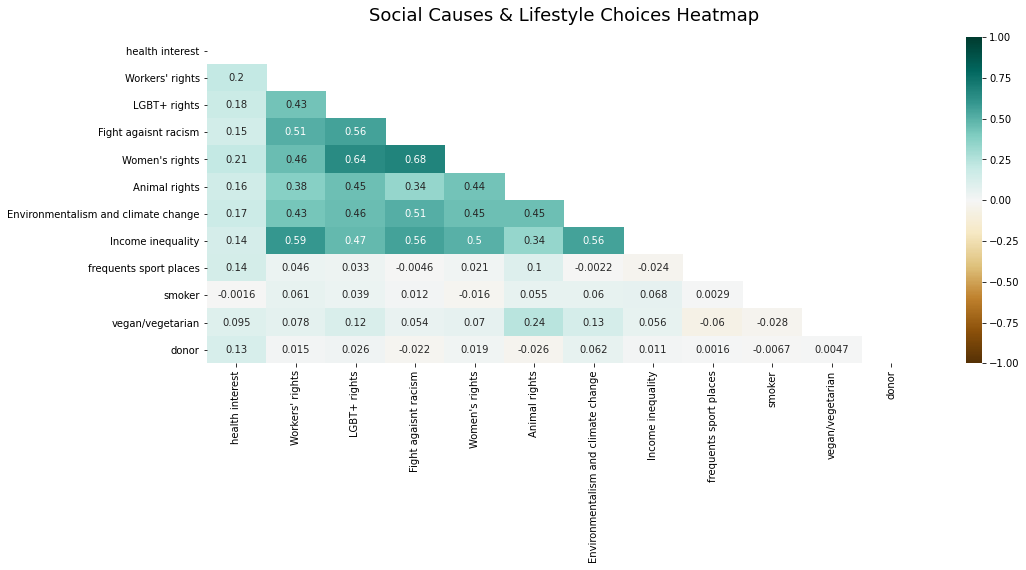

In [25]:
#visualize as heatmap, export data to visualize
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(causes_corr.corr(), dtype=np.bool))
heatmap = sns.heatmap(causes_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Social Causes & Lifestyle Choices Heatmap', fontdict={'fontsize':18}, pad=16);

In [26]:
#transform and export data to visualize in RawGraphs 
causes_corrrelation = causes_corr.corr()

causes_corr_export = causes_corrrelation.stack().reset_index()
causes_corr_export.columns = ['cause1','cause2','correlation']
print(causes_corr_export)
causes_corr_export.to_csv('causes_correlation_usa.csv')

              cause1                  cause2  correlation
0    health interest         health interest     1.000000
1    health interest         Workers' rights     0.204682
2    health interest            LGBT+ rights     0.184270
3    health interest    Fight agaisnt racism     0.154324
4    health interest          Women's rights     0.205171
..               ...                     ...          ...
139            donor       Income inequality     0.010817
140            donor  frequents sport places     0.001607
141            donor                  smoker    -0.006705
142            donor        vegan/vegetarian     0.004665
143            donor                   donor     1.000000

[144 rows x 3 columns]


## Do responses change based on target vs. control group? (All questions)
####Theses are respondents that either have volunteered to donate blood before but haven't considered doing so recently(control) or those that have not volunteered to donate blood but have considered doing so recently(target).

In [27]:
consider_donating(data,'Have you ever volunteered to donate blood?')

"Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?",No,Yes,% No,% Yes
Have you ever volunteered to donate blood?,,,,
No,226,73,75.6,24.4
Yes,101,107,48.6,51.4


In [28]:
#split data frames into yes, no,yes_consider,yes_volunteer
yes_volunteer = data.loc[(data['Have you ever volunteered to donate blood?'] == 'Yes') 
          & (data['Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?'] == 'No')]
yes_consider = data.loc[(data['Have you ever volunteered to donate blood?'] == 'No') 
          & (data['Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?'] == 'Yes')]
#target = pd.concat([yes_volunteer,yes_consider],axis=0).reset_index(drop=True)
yes = data.loc[(data['Have you ever volunteered to donate blood?'] == 'Yes') 
          & (data['Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?'] == 'Yes')]
no = data.loc[(data['Have you ever volunteered to donate blood?'] == 'No') 
          & (data['Have you considered donating blood recently (in 2020-2021, during the COVID-19 pandemic)?'] == 'No')]

In [29]:
def comparison_yes(yes_consider_df,yes_volunteer_df,question):
  yes_consider_grouped = yes_consider_df[['index',question]].groupby([question]).count().reset_index()
  yes_volunteer_grouped = yes_volunteer_df[['index',question]].groupby([question]).count().reset_index()
  compare = yes_consider_grouped.merge(yes_volunteer_grouped,how='left',on=question)
  compare = compare.rename(columns={'index_x':'yes_consider','index_y':'yes_volunteer'})
  compare['% yes_consider'] = round(((compare['yes_consider'] / compare['yes_consider'].sum()) * 100),1)
  compare['% yes_volunteer'] = round(((compare['yes_volunteer'] / compare['yes_volunteer'].sum()) * 100),1)
  return compare

In [30]:
first_info = comparison_yes(yes_consider,yes_volunteer,'Where did you first get information about donating blood? - Selected Choice')
first_info.to_csv('first_info_usa.csv')
first_info

,Where did you first get information about donating blood? - Selected Choice,yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,Other,3,2,4.1,2.0
1,Through friends and/or relatives,18,15,24.7,15.3
2,Through school or an employer,28,66,38.4,67.3
3,Through social media posts,7,2,9.6,2.0
4,Through the internet (not social media),5,3,6.8,3.1
5,Through the organization that manages the coll...,12,10,16.4,10.2


In [31]:
#how many blood donors do you know?
blood_donors = comparison_yes(yes_consider,yes_volunteer,'How many blood donors do you know?')
blood_donors.to_csv('known_donors_usa.csv')
blood_donors

,How many blood donors do you know?,yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,0,14,25,19.4,25.3
1,1,23,14,31.9,14.1
2,2,9,17,12.5,17.2
3,3,6,1,8.3,1.0
4,More than 3,20,42,27.8,42.4


In [32]:
social_media_use = comparison_yes(yes_consider,yes_volunteer,'How often do you use your social media accounts?')
social_media_use.to_csv('social_media_use_usa.csv')
social_media_use

,How often do you use your social media accounts?,yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,Between 1 and 2 hours per day,18,39,26.1,40.6
1,Between 2 and 3 hours per day,13,12,18.8,12.5
2,Less than 1 hour per day,22,33,31.9,34.4
3,More than 3 hours per day,16,12,23.2,12.5


In [33]:
follow_org = comparison_yes(yes_consider,yes_volunteer,'Do you follow the blood donation center in your area on social media?Single choice.')
follow_org.to_csv('following_org_usa.csv')
follow_org

,Do you follow the blood donation center in your area on social media?Single choice.,yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,No,66,92,93.0,96.8
1,Yes,5,3,7.0,3.2


In [34]:
donor_incentive = comparison_yes(yes_consider,yes_volunteer,'Would you be incentivized to donate blood if blood samples were taken directly at school and/or in the workplace?')
donor_incentive.to_csv('school_workplace_usa.csv')
donor_incentive

,Would you be incentivized to donate blood if blood samples were taken directly at school and/or in the workplace?,yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,Maybe,14,16,19.7,16.7
1,No,3,14,4.2,14.6
2,Yes,54,66,76.1,68.8


In [35]:
easy_info = comparison_yes(yes_consider,yes_volunteer,'In your opinion, where can you easily find information about upcoming blood donations? - Selected Choice')
easy_info.to_csv('easy_info_usa.csv')
easy_info

,"In your opinion, where can you easily find information about upcoming blood donations? - Selected Choice",yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,Friends and/or relatives,5,3,6.8,3.0
1,Local community,13,19,17.8,19.2
2,Other,9,12,12.3,12.1
3,School and/or workplace,21,37,28.8,37.4
4,Social media,25,28,34.2,28.3


In [36]:
feelings = comparison_yes(yes_consider,yes_volunteer,'What is your feeling about blood donation?')
feelings.to_csv('feeling_usa.csv')
feelings

,What is your feeling about blood donation?,yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,Doubtful,4,4,5.5,4.2
1,I'm not interested,1,2,1.4,2.1
2,Positive,68,89,93.2,93.7


In [37]:
#see or share blood donation content
share_content = comparison_yes(yes_consider,yes_volunteer,'Do you see or share content about donating blood in everyday social media use?')	
share_content.to_csv('share_content_usa.csv')

In [38]:
comparison_yes(yes_consider,yes_volunteer,'Are there any other ethical and social issues that you find particularly relevant in your life?Single choice.')

,Are there any other ethical and social issues that you find particularly relevant in your life?Single choice.,yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,No,35,39,50.7,41.5
1,Rather not answer,10,19,14.5,20.2
2,Yes,24,36,34.8,38.3


In [39]:
#loop through demographic columns for consider
columns_demos = list(yes_consider.iloc[:,19:25])
demo_dfs = []
for i in columns_demos:
    demo_dfs.append(percentage_response(yes_consider[i]))
    
#display
for i in demo_dfs:
    display(i)

,Gender,Percent
Female,40,54.8
Male,30,41.1
Rather not answer,3,4.1


,How old are you?,Percent
Between 19 and 22 years old,42,58.3
Between 23 and 25 years old,18,25.0
Between 26 and 30 years old,7,9.7
More than 30 years old,5,6.9


,What is your educational level? - Selected Choice,Percent
Bachelor Degree,28,38.4
Master Degree,24,32.9
High School,18,24.7
PhD,2,2.7
Other,1,1.4


,What is your educational level? - Other - Text,Percent
"Pursuing masters, have a bach.",1,100.0


,Do you currently live in New York City?,Percent
Yes,38,52.1
No,35,47.9


,"If you do not live in New York City, where do you currently live?",Percent
China,4,12.5
"Union City, NJ",1,3.1
Blacksburg,1,3.1
"Monterrey, Mexico",1,3.1
Massachusetts,1,3.1
"Long Grove, IL",1,3.1
Dubai,1,3.1
"Glenarden, Maryland",1,3.1
"San Ramon, CA",1,3.1
Barcelona,1,3.1


In [40]:
#'lifestyle' questions
columns_lifestyle = list(yes_consider.iloc[:,26:32])
lifestyle_dfs = []
for i in columns_lifestyle:
    lifestyle_dfs.append(percentage_response(yes_consider[i]))
    
#display
for i in lifestyle_dfs:
    display(i)

,"How interested are you in issues related to physical and mental well-being?An example is attention to physical activity, to the condition of one's body and mind, etc. - Group",Percent
Promoter,31,42.5
Passive,30,41.1
Detractor,12,16.4


,"How interested are you in issues related to physical and mental well-being?An example is attention to physical activity, to the condition of one's body and mind, etc.",Percent
9,17,23.3
8,16,21.9
10,14,19.2
7,14,19.2
6,4,5.5
5,4,5.5
4,2,2.7
3,1,1.4
0,1,1.4


,How often do you exercise on average?,Percent
More than three times per week,19,26.0
Three times per week,19,26.0
Once per week,13,17.8
Twice per week,12,16.4
Never,10,13.7


,"Do you frequent places for sporting or recreational activity?For example: gyms, sports centers, dance schools,...",Percent
No,44,60.3
Yes,29,39.7


,Do you smoke?,Percent
No,55,75.3
Yes,18,24.7


,Are you vegan or vegetarian?,Percent
No,59,80.8
Yes,14,19.2


In [41]:
comparison_yes(yes_consider,yes_volunteer,'Would you be enticed to donate blood or would you do it more frequently if there was a platform for sharing donations?Single choice.A "sharing platform" means an online environment created specifically for blood donations in which a user can share a post about the donation made, be actively informed and participate in events and challenges.')

,"Would you be enticed to donate blood or would you do it more frequently if there was a platform for sharing donations?Single choice.A ""sharing platform"" means an online environment created specifically for blood donations in which a user can share a post about the donation made, be actively informed and participate in events and challenges.",yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,No,30,47,60.0,71.2
1,Yes,20,19,40.0,28.8


In [42]:
comparison_yes(yes_consider,yes_volunteer,'Would you be encouraged to donate or would you do it more frequently if there were benefits, such as discounts or coupons, upon reaching a certain number of donations made?Single choice.')

,"Would you be encouraged to donate or would you do it more frequently if there were benefits, such as discounts or coupons, upon reaching a certain number of donations made?Single choice.",yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,No,17,24,30.9,35.3
1,Yes,38,44,69.1,64.7


In [43]:
comparison_yes(yes_consider,yes_volunteer,'Would you be encouraged to donate or would you do so more frequently if blood collection organizations were more active on social media?Single choice.By "blood collection organizations" we mean institutions such as New York Blood Center and the Red Cross')	

,"Would you be encouraged to donate or would you do so more frequently if blood collection organizations were more active on social media?Single choice.By ""blood collection organizations"" we mean institutions such as New York Blood Center and the Red Cross",yes_consider,yes_volunteer,% yes_consider,% yes_volunteer
0,No,19,37,35.8,52.9
1,Yes,34,33,64.2,47.1


In [44]:
reasons = pd.DataFrame(yes_consider['Is there a specific reason why you chose not to donate blood?More than one answer is possible - Other - Text'].dropna())

In [45]:
suggestions_all = pd.DataFrame(data['Please provide any considerations or advice that you think would be helpful in increasing the number of blood donors.'])
suggestions_all.to_csv('suggestions_text_usa.csv')

In [46]:
percentage_response(yes_consider['Do you see or share content about donating blood in everyday social media use?'])

,Do you see or share content about donating blood in everyday social media use?,Percent
No,63,88.7
Yes,8,11.3


In [47]:
percentage_response(yes_consider['If you saw sponsored posts related to blood donation on social media, would you open the link to get more information?'])

,"If you saw sponsored posts related to blood donation on social media, would you open the link to get more information?",Percent
Maybe,35,49.3
Yes,20,28.2
No,16,22.5


In [48]:
percentage_response(yes_consider['Have you seen your friends and/or followers sharing their blood donation experience?Single choice.'])

,Have you seen your friends and/or followers sharing their blood donation experience?Single choice.,Percent
No,49,69.0
Yes,22,31.0


In [49]:
percentage_response(yes_consider['Do you follow the blood donation center in your area on social media?Single choice.'])

,Do you follow the blood donation center in your area on social media?Single choice.,Percent
No,66,93.0
Yes,5,7.0
